# Greedy Policy



Step 0:

Step 1000:

Step 2000:

Step 3000:

Step 4000:

Step 5000:

Step 6000:

Step 7000:

Step 8000:

Step 9000:

Step 10000:

Step 11000:

Step 12000:

Step 13000:

Step 14000:

Step 15000:

Step 16000:

Step 17000:

Step 18000:

Step 19000:

Step 20000:

Step 21000:

Step 22000:

Step 23000:

Step 24000:

Step 25000:

Step 26000:

Step 27000:

Step 28000:

Step 29000:

Step 30000:

Step 31000:

Step 32000:

Step 33000:

Step 34000:

Step 35000:

Step 36000:

Step 37000:

Step 38000:

Step 39000:

Step 40000:

Step 41000:

Step 42000:

Step 43000:

Step 44000:

Step 45000:

Step 46000:

Step 47000:

Step 48000:

Step 49000:

Step 50000:

Step 51000:

Step 52000:

Step 53000:

Step 54000:

Step 55000:

Step 56000:

Step 57000:

Step 58000:

Step 59000:

Step 60000:

Step 61000:

Step 62000:

Step 63000:

Step 64000:

Step 65000:

Step 66000:

Step 67000:

Step 68000:

Step 69000:

Step 70000:

Step 71000:

Step 72000:

Step 73000:

Step 74000:

Step 75000:

Step 76000:

Step 77000:

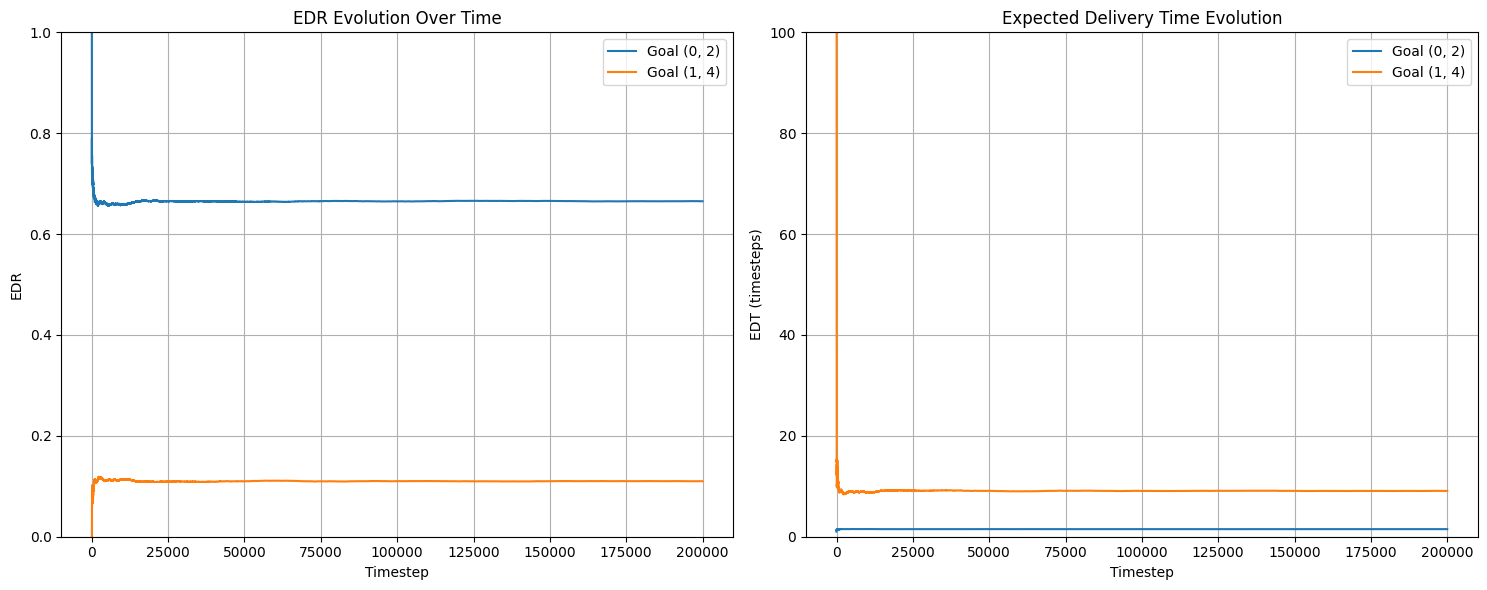


=== Final Statistics ===
Parameters: pSwap=0.8, pGen=0.8, maxAge=2
Network: edges=[(0, 1), (1, 2), (2, 3), (3, 4)], goals=[(0, 2), (1, 4)]

Final EDRs and EDTs:
Goal (0, 2):
  - EDR = 0.665090
  - EDT = 1.503556 timesteps
  - Successes: 133018
  - Total timesteps: 200000
Goal (1, 4):
  - EDR = 0.110070
  - EDT = 9.085128 timesteps
  - Successes: 22014
  - Total timesteps: 200000


In [13]:
def simulate_fair_policy(edges, goalEdges, pSwap, pGen, maxAge, num_steps=1000):
    # Initialize tracking
    total_timesteps = 0
    goal_success_counts = {goal: 0 for goal in goalEdges}
    edr_history = {goal: [] for goal in goalEdges}
    edt_history = {goal: [] for goal in goalEdges}  # Add EDT tracking
    
    # Initialize state: -1 means no entanglement
    current_state = {edge: -1 for edge in edges}
    
    def find_path(start, end, state):
        """Find path from start to end using BFS"""
        queue = [(start, [])]
        visited = set()
        
        while queue:
            current, path = queue.pop(0)
            if current == end:
                return path
            
            if current in visited:
                continue
            visited.add(current)
            
            # Try all possible next steps
            for edge in edges:
                s, e = edge
                # Check both directions of the edge
                if s == current and state[edge] >= 0 and state[edge] < maxAge:
                    if e not in visited:
                        queue.append((e, path + [edge]))
                elif e == current and state[edge] >= 0 and state[edge] < maxAge:
                    if s not in visited:
                        queue.append((s, path + [edge]))
        
        return None  # No path found
    
    for step in range(num_steps):
        # 1. Age existing entanglement
        for edge in edges:
            if current_state[edge] >= 0:
                current_state[edge] += 1
                if current_state[edge] >= maxAge:
                    current_state[edge] = -1  # Expire old entanglement
        
        # 2. Generate new entanglement
        for edge in edges:
            if current_state[edge] == -1 and random.random() < pGen:
                current_state[edge] = 0
        
        # 3. Collect all achievable goals and their rewards
        achievable_goals = []
        for goal in goalEdges:
            start, end = goal
            path = find_path(start, end, current_state)
            if path:
                # Calculate immediate reward (using EDR)
                current_edr = goal_success_counts[goal] / max(1, total_timesteps)
                num_edges = len(path)
                instant_rate = pSwap ** (num_edges - 1)
                reward = instant_rate #/ max(0.0001, current_edr)  # Higher reward for lower EDR
                achievable_goals.append((goal, path, reward))

        # 4. Choose the goal with highest reward (greedy choice)
        if achievable_goals:
            # Sort by reward and take the highest
            chosen_goal, chosen_path, _ = max(achievable_goals, key=lambda x: x[2])
            goal_success_counts[chosen_goal] += 1
            # Consume entanglement only for the chosen goal
            for edge in chosen_path:
                current_state[edge] = -1
        
        total_timesteps += 1
        
        # Update EDR and EDT history
        for goal in goalEdges:
            current_edr = goal_success_counts[goal] / total_timesteps
            edr_history[goal].append(current_edr)
            # Calculate EDT (inverse of EDR)
            current_edt = 1 / max(current_edr, 0.0001)  # Avoid division by zero
            edt_history[goal].append(current_edt)
        
        # Print progress
        if step % 1000 == 0:
            print(f"\nStep {step}:")
            
    # Create two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot EDR evolution
    for goal, edr_values in edr_history.items():
        ax1.plot(range(len(edr_values)), edr_values, label=f'Goal {goal}')
    ax1.set_xlabel('Timestep')
    ax1.set_ylabel('EDR')
    ax1.set_title('EDR Evolution Over Time')
    ax1.grid(True)
    ax1.legend()
    ax1.set_ylim(0, 1)

    # Plot EDT evolution
    for goal, edt_values in edt_history.items():
        ax2.plot(range(len(edt_values)), edt_values, label=f'Goal {goal}')
    ax2.set_xlabel('Timestep')
    ax2.set_ylabel('EDT (timesteps)')
    ax2.set_title('Expected Delivery Time Evolution')
    ax2.grid(True)
    ax2.legend()
    ax2.set_ylim(0, 100)  # Adjust this limit based on your EDTs

    plt.tight_layout()
    plt.show()
    
    # Print final statistics
    print(f"\n=== Final Statistics ===")
    print(f"Parameters: pSwap={pSwap}, pGen={pGen}, maxAge={maxAge}")
    print(f"Network: edges={edges}, goals={goalEdges}")
    print("\nFinal EDRs and EDTs:")
    for goal in goalEdges:
        final_edr = goal_success_counts[goal] / total_timesteps
        final_edt = 1 / max(final_edr, 0.0001)
        print(f"Goal {goal}:")
        print(f"  - EDR = {final_edr:.6f}")
        print(f"  - EDT = {final_edt:.6f} timesteps")
        print(f"  - Successes: {goal_success_counts[goal]}")
        print(f"  - Total timesteps: {total_timesteps}")
    
    return edr_history, edt_history, goal_success_counts, total_timesteps

# Example usage
edges = [(0, 1), (1, 2), (2, 3), (3,4)]
goalEdges = [(0, 2), (1, 4)]
pSwap = 0.8
pGen = 0.8
maxAge = 2

edr_history, edt_history, goals_achieved, total_timesteps = simulate_fair_policy(
    edges=edges,
    goalEdges=goalEdges,
    pSwap=pSwap,
    pGen=pGen,
    maxAge=maxAge,
    num_steps=200000
)